# Machine Learning: Anime Recommendation

from Kaggle: <a href="https://www.kaggle.com/CooperUnion/anime-recommendations-database">Anime Recommendations Database</a>

***

### Data Collection

##### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
from sklearn.preprocessing import StandardScaler

#### Dataframes

In [2]:
anime=pd.read_csv("anime.csv", index_col="anime_id")

In [3]:
# updated list to fill in the gaps in data
animelist=pd.read_csv("AnimeList.csv", index_col='anime_id')

### Data Cleaning

#### Missing values

In [4]:
anime.isna().sum()

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
# dropping those with NA in "genre", "type", "rating"
anime[anime.loc[:, ["genre", "type", "rating"]].isna().all(axis=1)]
anime.drop(anime[anime.loc[:, ["genre", "type", "rating"]].isna().all(axis=1)].index, axis=0, inplace=True)

#### 'Types'

In [5]:
# trying to fill in the missing type information from new animelist, there are still "Unknown"
anime.type.fillna(animelist.type, inplace=True)

In [6]:
# fill in the rest by research
anime_type={34437: "Movie", 32455: "TV", 28613: "TV", 30448: "TV", 24023: "TV", 34348: "TV"}
anime.loc[anime.type=="Unknown", "type"]=anime[anime.type=="Unknown"].index.map(anime_type)

In [8]:
# should we group them into 5 instead of 6?
anime.type.value_counts(normalize=True)

TV         0.309576
OVA        0.269384
Movie      0.191360
Special    0.136360
ONA        0.053616
Music      0.039704
Name: type, dtype: float64

In [7]:
anime["type"]=np.where(anime.type.isin(["ONA", "Music"]), "Other", anime.type)

In [8]:
# dummies
anime=pd.get_dummies(data=anime, columns=["type"],drop_first=True)

#### 'Airing'

In [9]:
# creating a dummy column for airing using episode as an indicator
anime["airing"]=np.where(anime.episodes=="Unknown", 1, 0)

#### 'Episodes'

In [10]:
anime["episodes"]=np.where(anime.episodes=="Unknown", 0, anime.episodes)
anime["episodes"]=anime.episodes.astype(int)

#### 'No rating'

In [11]:
# creating a dummy column for whether it was NA for rating
anime["rate_na"]=np.where(anime.rating.isna(), 1, 0)

In [12]:
# fill all the NA in rating as 0
anime.rating.fillna(0, inplace=True)

In [13]:
anime["rating"]=np.where(anime.rating>=7.5, 1, 0)

In [16]:
anime.describe(include="all")

,name,genre,episodes,rating,members,type_OVA,type_Other,type_Special,type_TV,airing,rate_na
count,12291,12232,12291.000000,12291.000000,1.229100e+04,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000
unique,12289,3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Saru Kani Gassen,Hentai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.043040,0.142625,1.807560e+04,0.269384,0.093320,0.136360,0.309576,0.027418,0.018469
std,NaN,NaN,46.262561,0.349704,5.482669e+04,0.443658,0.290893,0.343184,0.462338,0.163306,0.134645
min,NaN,NaN,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.000000,2.255000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2.000000,0.000000,1.551000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,12.000000,0.000000,9.443000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


#### Standardizing

In [14]:
# standardize the data for members
scaler=StandardScaler()
anime[["episodes", "members"]]=scaler.fit_transform(anime[["episodes", "members"]])

#### 'Genre'

In [15]:
# Missing values in genre
missingvalues_genre_titles = anime[anime.genre.isnull()].index.tolist()
len(missingvalues_genre_titles)

59

In [19]:
# Cross-referencing our missing values with the newest version of the dataset
animelist[animelist.index.isin(missingvalues_genre_titles)];

In [15]:
# Filling the missing values that are available in the newest version of the dataset
anime['genre'] = anime['genre'].fillna(animelist['genre'])
anime['genre'].isnull().sum()

40

In [17]:
anime[anime['genre'].isnull()];

In [16]:
# Research and replace the remaining missing values 
anime.at[29765, 'genre'] = 'Short' #Metropolis (2009)
anime.at[32695, 'genre'] = 'Fantasy' #Match Shoujo
anime.at[33187, 'genre'] = 'Short' #Katsudou Shashin
anime.at[30862, 'genre'] = 'Short' #Yubi wo Nusunda Onna
anime.at[28987, 'genre'] = 'Short' #Kamakura
anime.at[29629, 'genre'] = 'Short' #Coffee Break
anime.at[28653, 'genre'] = 'Short' #Maze
anime.at[31834, 'genre'] = 'Short' #Mormorando
anime.at[31760, 'genre'] = 'Short' #Tsuru Shitae Waka Kan
anime.at[31831, 'genre'] = 'Short' #Fantasy
anime.at[31833, 'genre'] = 'Short' #Metamorphose
anime.at[30399, 'genre'] = 'Short' #Arigatou Gomennasai
anime.at[28655, 'genre'] = 'Short' #PiKA PiKA
anime.at[31832, 'genre'] = 'Short' #Zawazawa
anime.at[28647, 'genre'] = 'Short' #Kappo
anime.at[29764, 'genre'] = 'Short' #Blend
anime.at[29921, 'genre'] = 'Short' #Bunbuku Chagama (1958)
anime.at[29655, 'genre'] = 'Short' #Chanda Gou
anime.at[29923, 'genre'] = 'Short' #Fukusuke
anime.at[30861, 'genre'] = 'Short' #Happy Bogeys
anime.at[32636, 'genre'] = 'Short' #Hokori Inu no Hanashi
anime.at[31511, 'genre'] = 'Short' #Holiday
anime.at[31509, 'genre'] = 'Short' #Ichi-gan Kuni
anime.at[29920, 'genre'] = 'Short' #Kobutori (1957)
anime.at[30055, 'genre'] = 'Adventure' #Mabeob Chunjamun: Daemawangui Buhwaleul Magala
anime.at[29767, 'genre'] = 'Short' #Minamo
anime.at[29922, 'genre'] = 'Short' #Ou-sama Ninatta Kitsune
anime.at[33318, 'genre'] = 'Short' #Scripta Volant
anime.at[31508, 'genre'] = 'Short' #Shinya Doubutsuen
anime.at[33320, 'genre'] = 'Short' #Suijun Genten
anime.at[30408, 'genre'] = 'Short' #Tokyo SOS
anime.at[33319, 'genre'] = 'Short' #Wareware no Heya
anime.at[32644, 'genre'] = 'Short' #Yaseruyagi
anime.at[33388, 'genre'] = 'Adventure' #Charanpo Shima no Monogatari
anime.at[33389, 'genre'] = 'Fantasy' #Genba no Joukitsune
anime.at[34310, 'genre'] = 'Kids' #Tamagotchi Movie: Tanpen Himitsu no Otodoke Daisakusen!
anime.at[33390, 'genre'] = 'Action' #Zunda Horizon

In [19]:
# Check missing values again to be sure
anime[anime['genre'].isnull()];

In [17]:
# Drop the three titles where we couldn't find the genre 
anime.drop(anime[anime.genre.isnull()].index, inplace=True)
anime.shape

(12288, 11)

In [21]:
# Genre has way too many unique values!
anime.genre.nunique()

3272

In [22]:
anime.genre.value_counts()

Hentai                                                                 823
Comedy                                                                 524
Music                                                                  303
Kids                                                                   200
Comedy, Slice of Life                                                  179
                                                                      ... 
Action, Demons, Fantasy, Historical, Military, Shoujo, Supernatural      1
Action, Mystery, Romance, Super Power, Thriller                          1
Action, Magic, Mystery, Supernatural                                     1
Comedy, Samurai, School                                                  1
Action, Demons, Music                                                    1
Name: genre, Length: 3272, dtype: int64

In [23]:
# number of anime with multiple genres 
anime[anime.genre.str.contains(",")].shape

(9436, 11)

In [17]:
# explore the variety of genre within anime
log=[j.strip(r" ") for i in anime.genre.str.lower().dropna().values for j in i.split(",")]
print(len(log), 'values')
print(len(set(log)), 'unique values')

36356 values
44 unique values


In [25]:
# frequency of each genre mentioned in the dataset
pd.Series(log).value_counts()

comedy           4649
action           2849
adventure        2350
fantasy          2315
sci-fi           2070
drama            2018
shounen          1712
kids             1610
romance          1466
slice of life    1224
school           1222
hentai           1141
supernatural     1038
mecha             944
music             862
historical        808
magic             779
ecchi             637
shoujo            604
seinen            547
sports            543
mystery           495
super power       465
military          426
parody            408
space             381
horror            369
harem             319
demons            294
martial arts      266
dementia          243
psychological     229
police            197
game              181
samurai           148
vampire           102
thriller           87
cars               72
shounen ai         65
shoujo ai          55
josei              54
yuri               42
yaoi               39
short              31
dtype: int64

In [18]:
# splitting the multiple genre
dummies=anime.genre.str.split(", ", expand=True)

In [19]:
# making dummies columns
dummies=dummies.stack().str.get_dummies().sum(level=0)

In [20]:
# Join the genre dummies to the anime dataframe
anime=anime.join(dummies)
anime.columns

Index(['name', 'genre', 'episodes', 'rating', 'members', 'type_OVA',
       'type_Other', 'type_Special', 'type_TV', 'airing', 'rate_na', 'Action',
       'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei',
       'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Short', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

***

## Exploratory Data Analysis

In [21]:
# Prepare dataframe for analysis
df=anime.drop(["genre", "name"], axis=1)

In [36]:
from pandas_profiling import ProfileReport
prof = ProfileReport(anime)
prof.to_file(output_file='output.html')

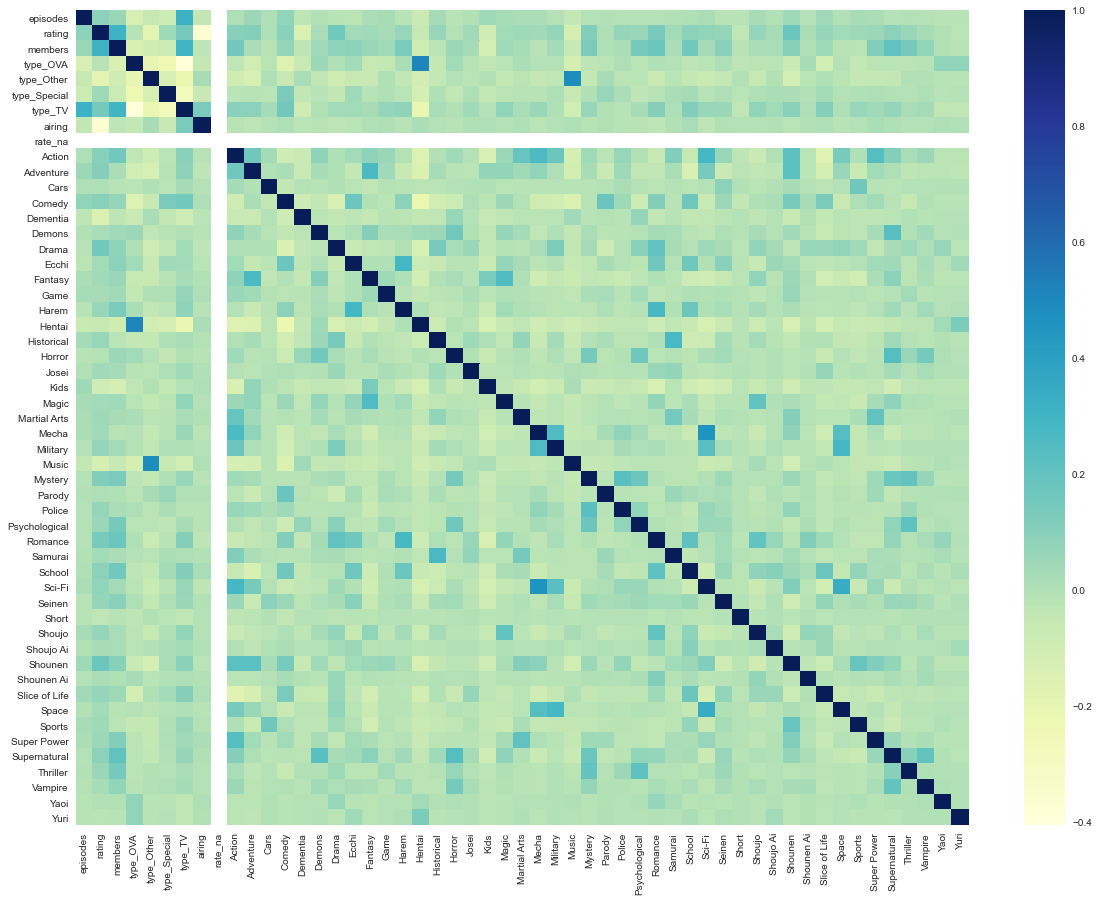

In [37]:
# Create correlation Matrix using numeric columns
corrMatrix = df.corr()

# Visualize columns with high collinearity with a heatmap
plt.figure(figsize = (20,15))
sns.heatmap(corrMatrix, cmap="YlGnBu") #annot=True
plt.show()

***

## Clustering

##### Libraries

In [24]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

import time
sns.set_context('poster')
sns.set_color_codes()

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Elbow Method

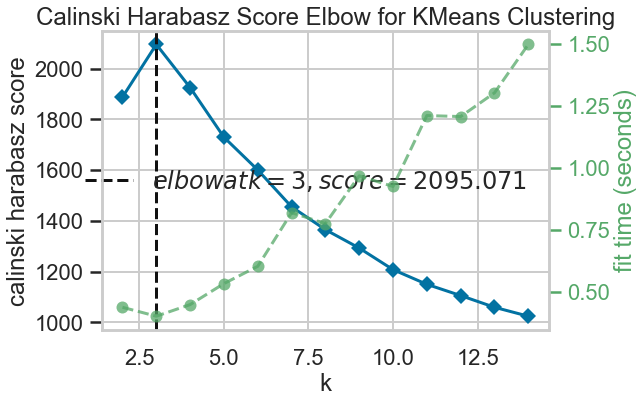

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figurem k

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeE

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001579BB03280>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=True)

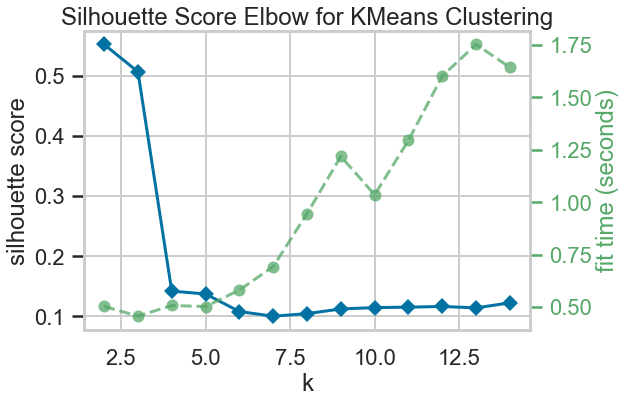

In [26]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), df, k=(2,15), metric='silhouette')

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001579BBAD280>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

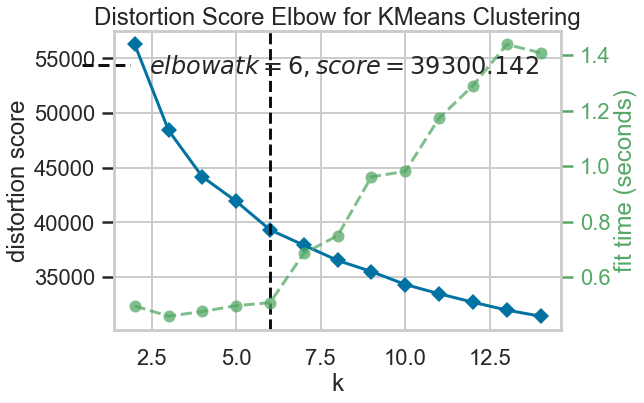

In [27]:
kelbow_visualizer(KMeans(random_state=4), df, k=(2,15))

In [41]:
visualizer.elbow_value_

4

### PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(0.85)
pca.fit(df)
pca.explained_variance_ratio_.round(2)

array([0.22, 0.18, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01])

In [30]:
pca.singular_values_.shape[0]

19

In [24]:
df_pca=pca.transform(df)

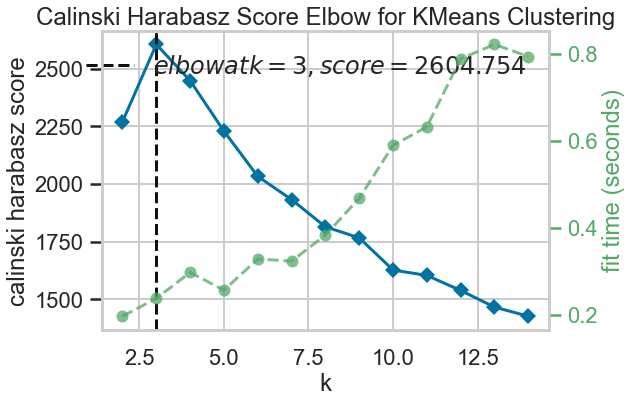

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figurem k

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeE

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001579BDB2B80>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=True)

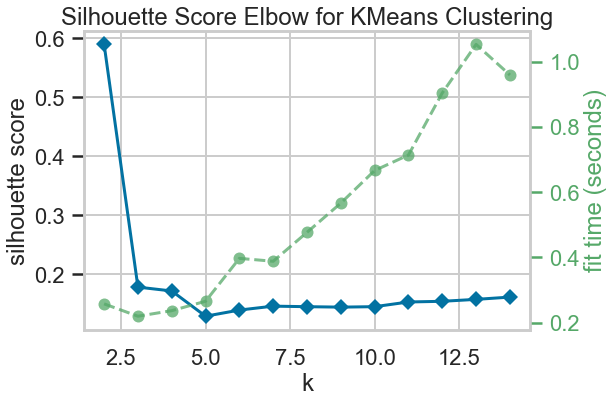

In [33]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), df_pca, k=(2,15), metric='silhouette')

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001579BE23E50>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

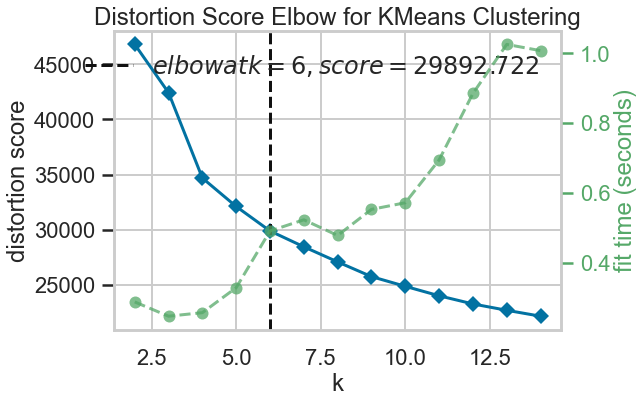

In [34]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), df_pca, k=(2,15))

In [34]:
df_pca;

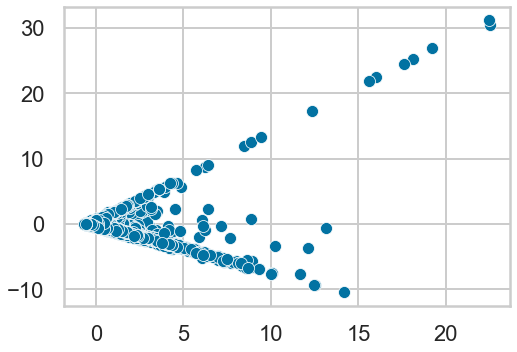

In [35]:
sns.scatterplot(df_pca[:,0], df_pca[:, 1])

In [36]:
model = KMeans(n_clusters=6)
model.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
model.labels_

array([1, 1, 2, ..., 0, 0, 0])

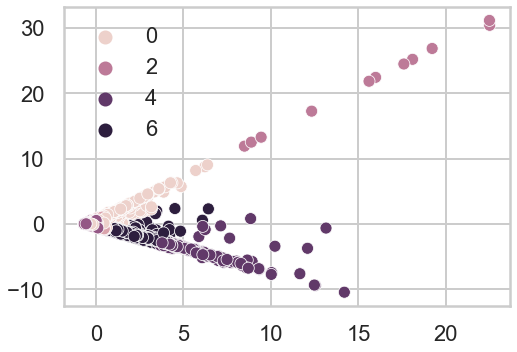

In [37]:
sns.scatterplot(df_pca[:,0], df_pca[:, 1], hue=model.labels_)

In [65]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([3890, 4729,  343, 3077,  238,   11], dtype=int64))

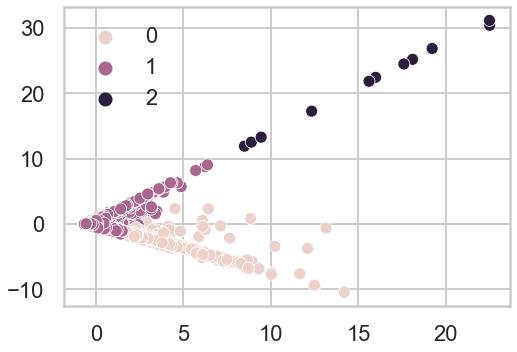

In [38]:
model = KMeans(n_clusters=3)
model.fit(df_pca)
sns.scatterplot(df_pca[:,0], df_pca[:, 1], hue=model.labels_)

In [63]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2]), array([5715, 6562,   11], dtype=int64))

#### Fuzzy C-Mean

In [25]:
from fcmeans import FCM

In [26]:
model = FCM(n_clusters=6) #using the number of cluster as suggested with our previous measure
model.fit(df_pca)

In [41]:
model.u #this is the likelihood to each cluster for each anime

array([[0.16666653, 0.16666676, 0.16666661, 0.16666681, 0.16666662,
        0.16666666],
       [0.16666664, 0.16666669, 0.16666665, 0.1666667 , 0.16666666,
        0.16666667],
       [0.16666642, 0.16666684, 0.16666656, 0.16666693, 0.16666658,
        0.16666666],
       ...,
       [0.16666711, 0.16666635, 0.16666686, 0.16666619, 0.16666682,
        0.16666668],
       [0.16666712, 0.16666634, 0.16666686, 0.16666618, 0.16666682,
        0.16666668],
       [0.1666673 , 0.16666621, 0.16666694, 0.16666599, 0.16666688,
        0.16666668]])

In [27]:
# creating a reference table with the anime_id
ref=pd.DataFrame(model.u, index=df.index, columns=["cluster1", "cluster2", "cluster3", "cluster4", "cluster5", "cluster6"])

In [28]:
rating=pd.read_csv("rating.csv")

In [29]:
# bringing in the cluster likelihood for each anime in the rating table
df=rating.merge(ref, left_on="anime_id", right_index=True)

In [30]:
# rating grouped by whether it is highly recommended or not
df["rating"] = np.where(df.rating>=7.5, 1, 0)

In [45]:
# to check whether some of the anime in the rating is missing or not from the reference table
set(rating.anime_id.value_counts().index).difference(set(ref.index))

{20261, 30435, 30913, 30924}

### Random Forest

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [46]:
X_train, X_test,y_train,y_test = train_test_split(df.drop("rating", axis=1), df.rating, test_size= 0.3, random_state=17)

In [47]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(X_test)

In [49]:
model.score(X_test, y_test)

-0.25605775824390586

In [ ]:
model

In [50]:
from sklearn.linear_model import RidgeCV, LassoCV

In [51]:
reg=LassoCV()
reg.fit(df.drop("rating", axis=1),df["rating"])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
print('best alpha is',reg.alpha_)
print('best R2 is', reg.score(df.drop("rating", axis=1),df["rating"]))

best alpha is 20.998584015393707
best R2 is 1.1102230246251565e-16


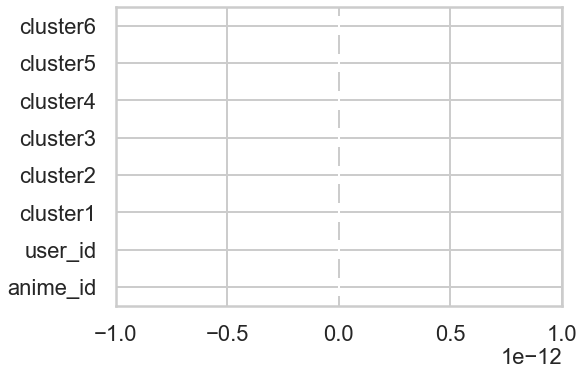

In [53]:
coef=pd.Series(reg.coef_, index=df.drop("rating", axis=1).columns)
coef.sort_values().plot.barh()

In [54]:
reg1=RidgeCV()
reg1.fit(df.drop("rating", axis=1),df["rating"])
print('best alpha is',reg1.alpha_)
print('best R2 is', reg1.score(df.drop("rating", axis=1),df["rating"]))

best alpha is 0.1
best R2 is -77.19425593032692


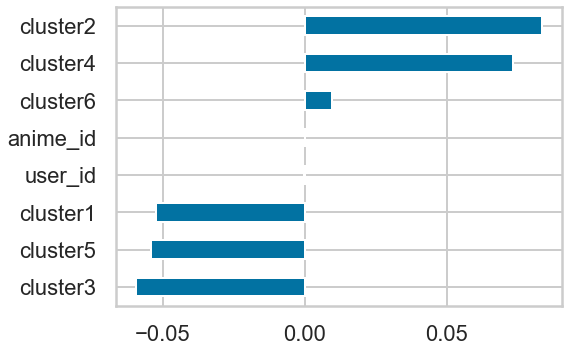

In [55]:
coef1=pd.Series(reg1.coef_, index=df.drop("rating", axis=1).columns)
coef1.sort_values().plot.barh()

In [56]:
from statsmodels.formula.api import ols
from statsmodels.api import add_constant, OLS

In [57]:
model2=OLS(df["rating"], add_constant(df.drop("rating", axis=1))).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5080.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:11:18   Log-Likelihood:            -5.6628e+06
No. Observations:             7813689   AIC:                         1.133e+07
Df Residuals:                 7813685   BIC:                         1.133e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4102      0.000   1117.656      0.000       0.409       0.411
user_id     2.644e-08   8.51e-09      3.106      0.002    9.76e-09    4.31e-08
anime_id   -3.494e-07   2.01e-08    -17.352      0.000   -3.89e-07    -3.1e-07
cluster1   -9.115e+04    742.785   -122.714      0.000   -9.26e+04   -8.97e+04
cluster2    1.451e+05   1182.554    122.714      0.000    1.43e+05    1.47e+05
cluster3   -1.036e+05    844.522   -122.714      0.000   -1.05e+05   -1.02e+05
cluster4    1.274e+05   1038.316    122.714      0.000    1.25e+05    1.29e+05
cluster5   -9.405e+04    766.420   -122.714      0.000   -9.56e+04   -9.25e+04
cluster6     1.63e+04    132.857    122.714      0.000     1.6e+04    1.66e+04
==============================================================================
Omnibus:                 26725511.138   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1292617.662
Skew:                           0.024   Prob(JB):                         0.00
Kurtosis:                       1.008   Cond. No.                     1.54e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Scaling the user_id and anime_id

In [31]:
scaler=StandardScaler()
df[["user_id", "anime_id"]]=scaler.fit_transform(df[["user_id", "anime_id"]])

In [34]:
X_train, X_test,y_train,y_test = train_test_split(df.drop("rating", axis=1), df.rating, test_size= 0.3, random_state=17)

In [60]:
model3=RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
y_pred2 = model3.predict(X_test)

In [62]:
model3.score(X_test, y_test)

-0.2560033942351765

In [63]:
reg2=LassoCV()
reg2.fit(df.drop("rating", axis=1),df["rating"])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [64]:
print('best alpha is',reg2.alpha_)
print('best R2 is', reg2.score(df.drop("rating", axis=1),df["rating"]))

best alpha is 0.002363688861901901
best R2 is -2.220446049250313e-16


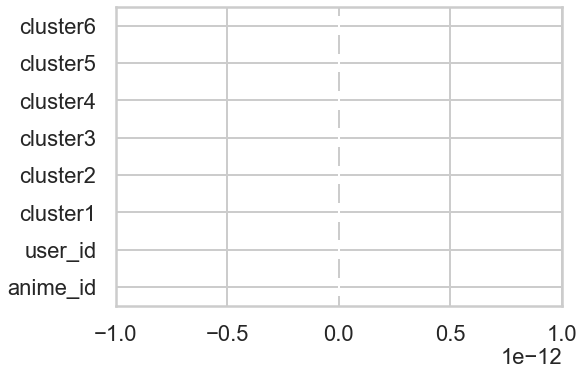

In [65]:
coef2=pd.Series(reg2.coef_, index=df.drop("rating", axis=1).columns)
coef2.sort_values().plot.barh()

In [66]:
reg3=RidgeCV()
reg3.fit(df.drop("rating", axis=1),df["rating"])
print('best alpha is',reg3.alpha_)
print('best R2 is', reg3.score(df.drop("rating", axis=1),df["rating"]))

best alpha is 0.1
best R2 is 2.3189340055962404e-05


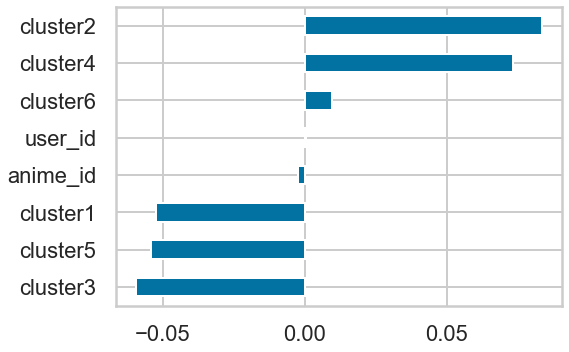

In [67]:
coef3=pd.Series(reg3.coef_, index=df.drop("rating", axis=1).columns)
coef3.sort_values().plot.barh()

In [68]:
model4=OLS(df["rating"], add_constant(df.drop("rating", axis=1))).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:42:12   Log-Likelihood:            -5.6434e+06
No. Observations:             7813689   AIC:                         1.129e+07
Df Residuals:                 7813683   BIC:                         1.129e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.022e+11   4.28e+09     47.294      0.000    1.94e+11    2.11e+11
user_id        0.0004      0.000      2.382      0.017    7.53e-05       0.001
anime_id      -0.0027      0.000    -14.957      0.000      -0.003      -0.002
cluster1    2.641e+11   2.68e+09     98.727      0.000    2.59e+11    2.69e+11
cluster2   -4.061e+12   8.66e+10    -46.913      0.000   -4.23e+12   -3.89e+12
cluster3    2.295e+12   5.23e+10     43.865      0.000    2.19e+12     2.4e+12
cluster4    4.745e+12   9.75e+10     48.692      0.000    4.55e+12    4.94e+12
cluster5   -2.892e+12   6.47e+10    -44.724      0.000   -3.02e+12   -2.77e+12
cluster6   -1.565e+12   2.56e+10    -61.073      0.000   -1.61e+12   -1.51e+12
==============================================================================
Omnibus:                 27013941.863   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1268286.071
Skew:                           0.021   Prob(JB):                         0.00
Kurtosis:                       1.027   Cond. No.                     3.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [40]:
model=[]

In [76]:
model1=LogisticRegression(max_iter=1e8)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
display(conf1)
acc1=accuracy_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
pr1=precision_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
print(acc1,pr1,rec1,f11)
model.append(["Logistic Regression",acc1,pr1,rec1,f11])

array([[1188177,       0],
       [1155930,       0]], dtype=int64)

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5068783122954712 0.0 0.0 0.0


FileNotFoundError: [Errno 2] No such file or directory: 'graph/ROC Logistic.png'

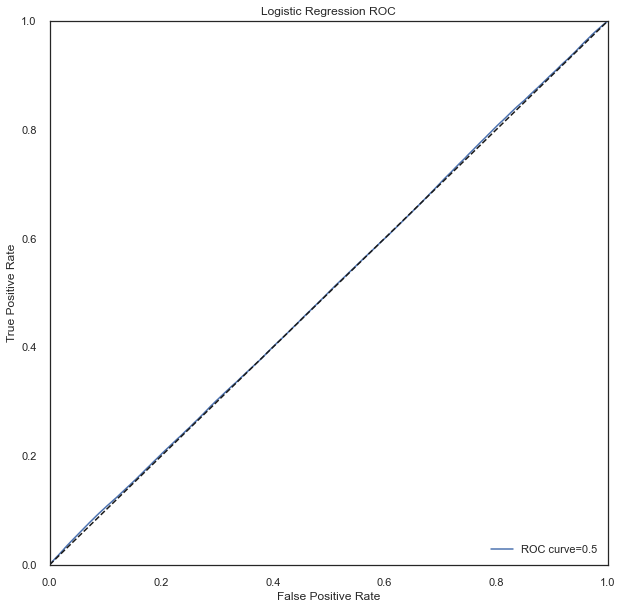

In [77]:
model_roc = roc_auc_score(y_test,  y_pred1)
fpr4,tpr4,thresholds4=roc_curve(y_test, model1.predict_proba(X_test)[:,1])


In [ ]:
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Logistic.png")

In [78]:
model2=LogisticRegression(max_iter=1e8, class_weight='balanced')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
display(conf2)
acc2=accuracy_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
pr2=precision_score(y_test,y_pred2)
f12=f1_score(y_test,y_pred2)
print(acc2,pr2,rec2,f12)
model.append(["Logistic Regression balanced",acc2,pr2,rec2,f12])

array([[483566, 704611],
       [470260, 685670]], dtype=int64)

0.49879804974772907 0.4931880677359469 0.5931760573737164 0.538580659654679


In [ ]:
model3=SVC(probability=True)
test=model3.fit(X_train,y_train)
test = classifier.fit(X_train, y_train)
probas_=test.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC SVC.png")
plt.show()
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)


In [ ]:
model4=NuSVC(nu=0.1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
display(conf4)
acc4=accuracy_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
pr4=precision_score(y_test,y_pred4)
f14=f1_score(y_test,y_pred4)
print(acc4,pr4,rec4,f14)
model.append(["Nu SVC",acc4,pr4,rec4,f14])

In [41]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
display(conf5)
acc5=accuracy_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
pr5=precision_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)
print(acc5,pr5,rec5,f15)
model.append(["Gaussian Naive Bayes",acc5,pr5,rec5,f15])

array([[1188284,       0],
       [1155834,       0]], dtype=int64)

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5069215798863368 0.0 0.0 0.0


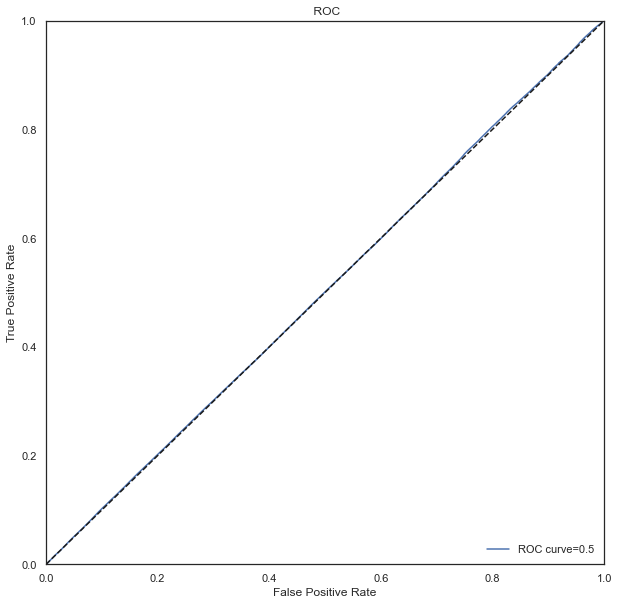

In [42]:
model_roc = roc_auc_score(y_test,  y_pred5)
fpr4,tpr4,thresholds4=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [43]:
model6=DecisionTreeClassifier()
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
display(conf6)
acc6=accuracy_score(y_test,y_pred6)
rec6=recall_score(y_test,y_pred6)
pr6=precision_score(y_test,y_pred6)
f16=f1_score(y_test,y_pred6)
print(acc6,pr6,rec6,f16)
model.append(["Decision Tree",acc6,pr6,rec6,f16])

array([[673507, 514777],
       [513409, 642425]], dtype=int64)

0.5613761764552808 0.5551537242417486 0.5558107825172127 0.5554820590773338


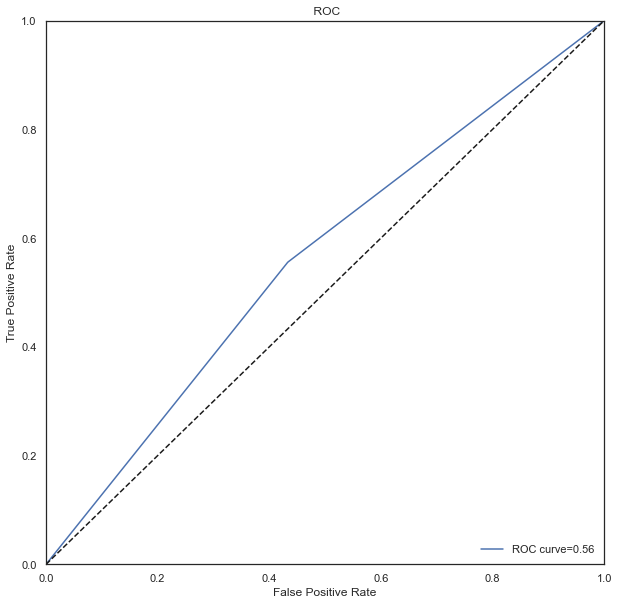

In [44]:
model_roc = roc_auc_score(y_test,  y_pred6)
fpr4,tpr4,thresholds4=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [45]:
model7=RandomForestClassifier()
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)
model.append(["Random Forest",acc7,pr7,rec7,f17])

array([[1148361,   39923],
       [1099124,   56710]], dtype=int64)

0.514082908795547 0.5868595614334647 0.049064138968052506 0.09055727615977108


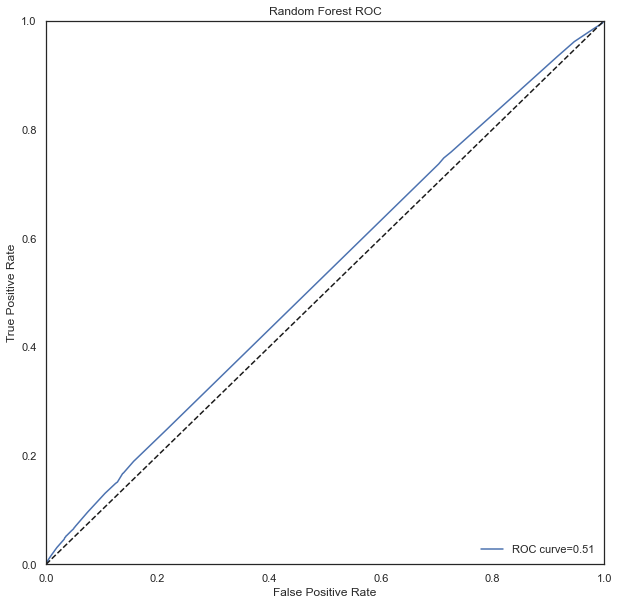

In [46]:
model_roc = roc_auc_score(y_test,  y_pred7)
fpr4,tpr4,thresholds4=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Random Forest.png")

In [ ]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X_train,y_train)
y_pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test,y_pred8)
display(conf8)
acc8=accuracy_score(y_test,y_pred8)
rec8=recall_score(y_test,y_pred8)
pr8=precision_score(y_test,y_pred8)
f18=f1_score(y_test,y_pred8)
print(acc8,pr8,rec8,f18)
model.append(["Random Forest balanced",acc8,pr8,rec8,f18])

In [47]:
model9=AdaBoostClassifier()
model9.fit(X_train,y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test,y_pred9)
display(conf9)
acc9=accuracy_score(y_test,y_pred9)
rec9=recall_score(y_test,y_pred9)
pr9=precision_score(y_test,y_pred9)
f19=f1_score(y_test,y_pred9)
print(acc9,pr9,rec9,f19)
model.append(["AdaBoost",acc9,pr9,rec9,f19])

array([[892609, 295675],
       [799286, 356548]], dtype=int64)

0.5328899825008809 0.5466657876217184 0.30847682279635313 0.3943990703832899


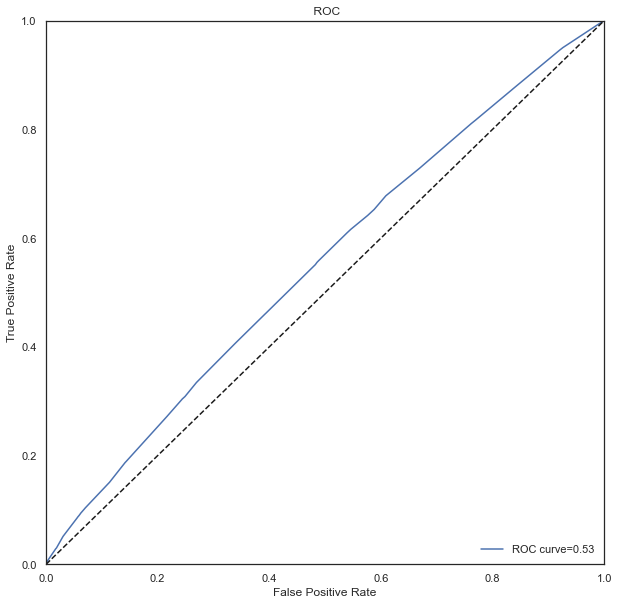

In [48]:
model_roc = roc_auc_score(y_test,  y_pred9)
fpr4,tpr4,thresholds4=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [51]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)
model.append(["KNN",acc11,pr11,rec11,f111])

array([[672277, 516007],
       [489569, 666265]], dtype=int64)

0.5710215953292453 0.563546290532128 0.5764365817236731 0.5699185580123398


ValueError: x and y must have same first dimension, but have shapes (39,) and (9,)

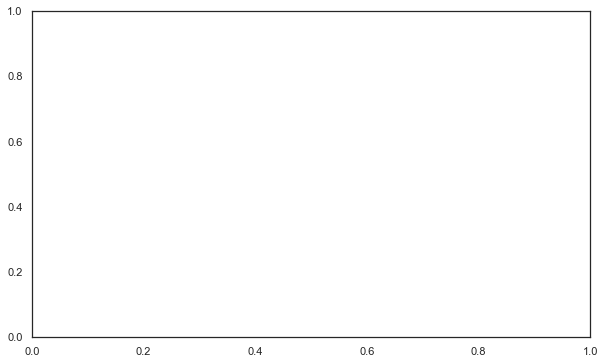

In [49]:
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")


In [50]:
error_rate

[0.4341419672559146,
 0.44168510288304597,
 0.4309420430200186,
 0.43476864219292716,
 0.4297876642728736,
 0.4316011395330781,
 0.42897840467075465,
 0.43049411335094906,
 0.4289481160931318]